# Decision Tree를 사용한 feature importance 뽑기

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree.export import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [30]:
total_20 = pd.read_csv('/root/Big_Contest/EDA/Data/Age/df_age20_jongro.csv')
total_30 = pd.read_csv('/root/Big_Contest/EDA/Data/Age/df_age30_jongro.csv')
total_40 = pd.read_csv('/root/Big_Contest/EDA/Data/Age/df_age40_jongro.csv')
total_50 = pd.read_csv('/root/Big_Contest/EDA/Data/Age/df_age50_jongro.csv')

In [31]:
total_20.head()

,age20accum,age20leisure goods,age20leisure busi,age20culture,age20furniture,age20electronic,age20kitchen,age20fuel,age20optic,age20Appliances,...,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,humi,temp,CONTENT,rain
0,685.0,318.0,3730.0,1977.0,0.0,0.0,0.0,59.0,99.0,17.0,...,68124,10029,15065,4995,84.070139,43.877083,61.370139,16.692569,515,0.0
1,212.0,188.0,2626.0,596.0,0.0,0.0,0.0,55.0,91.0,0.0,...,66428,9316,15306,3638,72.274306,30.051389,58.825694,19.561181,888,0.0
2,257.0,192.0,2831.0,782.0,12.0,0.0,0.0,64.0,113.0,51.0,...,66698,7793,13618,2648,66.162500,19.478472,63.531944,19.282292,856,0.1
3,205.0,202.0,2716.0,772.0,8.0,0.0,17.0,0.0,106.0,56.0,...,83667,9649,19985,3078,18.021097,10.726442,62.014583,14.202361,893,18.5
4,273.0,184.0,2898.0,1001.0,0.0,0.0,21.0,47.0,60.0,21.0,...,108727,9057,13849,3796,11.831711,8.579972,79.125000,8.963056,864,10.5


In [32]:
dateIdx = pd.date_range('2018-04-01', '2019-03-31')

total_20.index = dateIdx
total_30.index = dateIdx
total_40.index = dateIdx
total_50.index = dateIdx

In [33]:
# 이제부터는 각 feature가 CONTENT, pm10, pm25, humi, rain, temp에 영향을 얼마나 받는 지 확인

## 각 연령대 별 feature들을 list로 저장한다

columns_20 = total_20.columns.tolist()
columns_30 = total_30.columns.tolist()
columns_40 = total_40.columns.tolist()
columns_50 = total_50.columns.tolist()

In [34]:
# 20대

target20 = columns_20[:-6]
columns_20 = [c for c in total_20.columns.tolist() if c not in columns_20[:-6]]

train_20 = total_20.sample(frac=0.8, random_state=1234)
test_20 = total_20.loc[~total_20.index.isin(train_20.index)]

models_20 = []
model20_fit = []
feat_importances_20 = []
for i in range(len(target20)) :
    models_20.append(RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1))

for var, model in zip(target20, models_20) :
    model20_fit.append(model.fit(train_20[columns_20], train_20[var]))

for model in model20_fit :
    feat_importances_20.append(pd.Series(model.feature_importances_, index=total_20.T.index[-6:]))

feat_importances_20_df = pd.DataFrame(feat_importances_20, 
                                      index = target20,
                                      columns = feat_importances_20[0].index)

In [35]:
# 30대

target30 = columns_30[:-6]
columns_30 = [c for c in columns_30 if c not in target30]

train_30 = total_30.sample(frac=0.8, random_state=1234)
test_30 = total_30.loc[~total_30.index.isin(train_30.index)]

models_30 = []
model30_fit = []
feat_importances_30 = []
for i in range(len(target30)) :
    models_30.append(RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1))

for var, model in zip(target30, models_30) :
    model30_fit.append(model.fit(train_30[columns_30], train_30[var]))

for model in model30_fit :
    feat_importances_30.append(pd.Series(model.feature_importances_, index=total_30.T.index[-6:]))

feat_importances_30_df = pd.DataFrame(feat_importances_30, 
                                      index = target30,
                                      columns = feat_importances_30[0].index)

In [36]:
# 40대

target40 = columns_40[:-6]
columns_40 = [c for c in columns_40 if c not in target40]

train_40 = total_40.sample(frac=0.8, random_state=1234)
test_40 = total_40.loc[~total_40.index.isin(train_40.index)]

models_40 = []
model40_fit = []
feat_importances_40 = []
for i in range(len(target40)) :
    models_40.append(RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1))

for var, model in zip(target40, models_40) :
    model40_fit.append(model.fit(train_40[columns_40], train_40[var]))

for model in model40_fit :
    feat_importances_40.append(pd.Series(model.feature_importances_, index=total_40.T.index[-6:]))

feat_importances_40_df = pd.DataFrame(feat_importances_40, 
                                      index = target40,
                                      columns = feat_importances_40[0].index)

In [37]:
# 50대

target50 = columns_50[:-6]
columns_50 = [c for c in columns_50 if c not in target50]

train_50 = total_50.sample(frac=0.8, random_state=1234)
test_50 = total_50.loc[~total_50.index.isin(train_50.index)]

models_50 = []
model50_fit = []
feat_importances_50 = []
for i in range(len(target50)) :
    models_50.append(RandomForestRegressor(n_estimators=100, min_samples_leaf=8, random_state=1))

for var, model in zip(target50, models_50) :
    model50_fit.append(model.fit(train_50[columns_50], train_50[var]))

for model in model50_fit :
    feat_importances_50.append(pd.Series(model.feature_importances_, index=total_50.T.index[-6:]))

feat_importances_50_df = pd.DataFrame(feat_importances_50, 
                                      index = target50,
                                      columns = feat_importances_50[0].index)

In [38]:
feat_importances_20_df.drop('age20', inplace = True)
feat_importances_30_df.drop('age30', inplace = True)
feat_importances_40_df.drop('age40', inplace = True)
feat_importances_50_df.drop('age50', inplace = True)

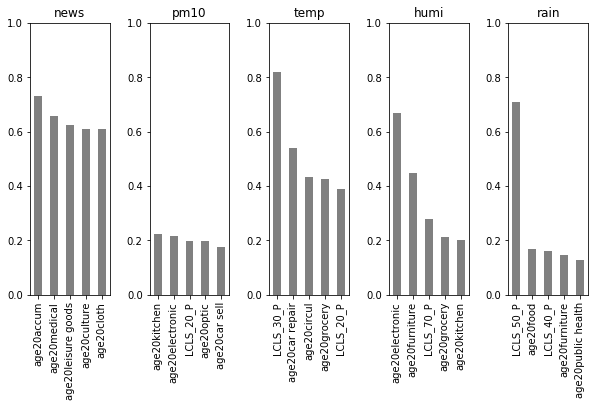

In [39]:
fig4, axes = plt.subplots(1, 5)

feat_importances_20_df.CONTENT.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[0], figsize = (10, 5), title = 'news', ylim = [0, 1], color = 'grey')
feat_importances_20_df.pm10.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[1], figsize = (10, 5), title = 'pm10', ylim = [0, 1], color = 'grey')
feat_importances_20_df.temp.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[2], figsize = (10, 5), title = 'temp', ylim = [0, 1], color = 'grey')
feat_importances_20_df.humi.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[3], figsize = (10, 5), title = 'humi', ylim = [0, 1], color = 'grey')
feat_importances_20_df.rain.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[4], figsize = (10, 5), title = 'rain', ylim = [0, 1], color = 'grey')

plt.subplots_adjust(wspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/JONGRO/img/feature_importance_20_jongro.png", dpi = 300)

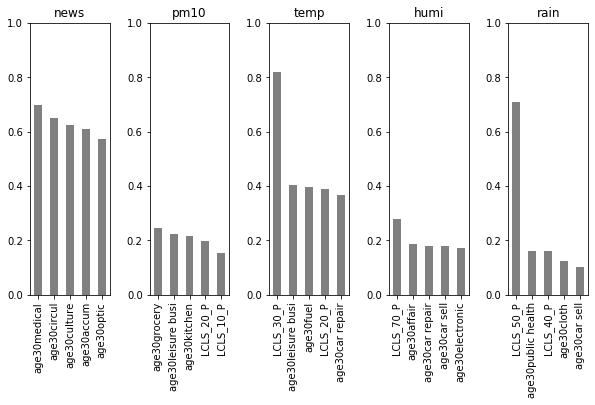

In [40]:
fig5, axes = plt.subplots(1, 5)

feat_importances_30_df.CONTENT.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[0], figsize = (10, 5), title = 'news', ylim = [0, 1], color = 'grey')
feat_importances_30_df.pm10.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[1], figsize = (10, 5), title = 'pm10', ylim = [0, 1], color = 'grey')
feat_importances_30_df.temp.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[2], figsize = (10, 5), title = 'temp', ylim = [0, 1], color = 'grey')
feat_importances_30_df.humi.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[3], figsize = (10, 5), title = 'humi', ylim = [0, 1], color = 'grey')
feat_importances_30_df.rain.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[4], figsize = (10, 5), title = 'rain', ylim = [0, 1], color = 'grey')

plt.subplots_adjust(wspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/JONGRO/img/feature_importance_30_jongro.png", dpi = 300)

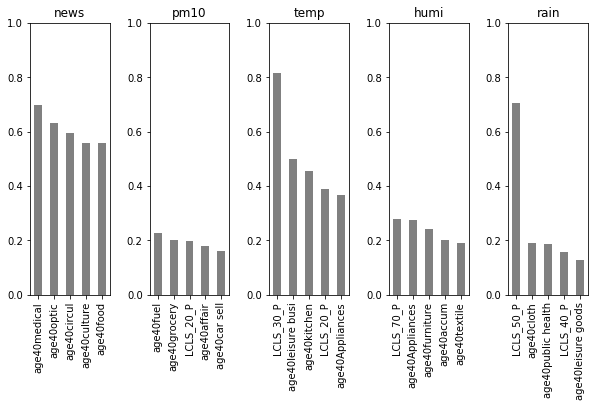

In [41]:
fig6, axes = plt.subplots(1, 5)

feat_importances_40_df.CONTENT.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[0], figsize = (10, 5), title = 'news', ylim = [0, 1], color = 'grey')
feat_importances_40_df.pm10.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[1], figsize = (10, 5), title = 'pm10', ylim = [0, 1], color = 'grey')
feat_importances_40_df.temp.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[2], figsize = (10, 5), title = 'temp', ylim = [0, 1], color = 'grey')
feat_importances_40_df.humi.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[3], figsize = (10, 5), title = 'humi', ylim = [0, 1], color = 'grey')
feat_importances_40_df.rain.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[4], figsize = (10, 5), title = 'rain', ylim = [0, 1], color = 'grey')

plt.subplots_adjust(wspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/JONGRO/img/feature_importance_40_jongro.png", dpi = 300)

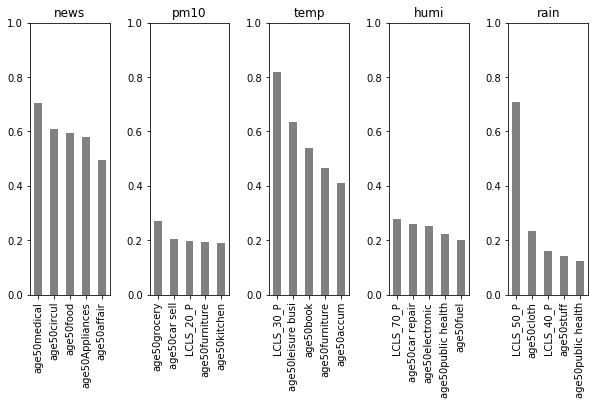

In [42]:
fig7, axes = plt.subplots(1, 5)

feat_importances_50_df.CONTENT.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[0], figsize = (10, 5), title = 'news', ylim = [0, 1], color = 'grey')
feat_importances_50_df.pm10.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[1], figsize = (10, 5), title = 'pm10', ylim = [0, 1], color = 'grey')
feat_importances_50_df.temp.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[2], figsize = (10, 5), title = 'temp', ylim = [0, 1], color = 'grey')
feat_importances_50_df.humi.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[3], figsize = (10, 5), title = 'humi', ylim = [0, 1], color = 'grey')
feat_importances_50_df.rain.sort_values(ascending = False)[:5].plot(kind = 'bar', ax = axes[4], figsize = (10, 5), title = 'rain', ylim = [0, 1], color = 'grey')

plt.subplots_adjust(wspace = 0.5)
plt.savefig("/root/Big_Contest/EDA/JONGRO/img/feature_importance_50_jongro.png", dpi = 300)

In [43]:
feat_importances_20_CONTENT = list(feat_importances_20_df.iloc[np.where(feat_importances_20_df.CONTENT >= 0.4)[0]].index)
feat_importances_20_temp = list(feat_importances_20_df.iloc[np.where(feat_importances_20_df.temp >= 0.4)[0]].index)
feat_importances_20_rain = list(feat_importances_20_df.iloc[np.where(feat_importances_20_df.rain >= 0.4)[0]].index)

feat_importances_30_CONTENT = list(feat_importances_30_df.iloc[np.where(feat_importances_30_df.CONTENT >= 0.4)[0]].index)
feat_importances_30_temp = list(feat_importances_30_df.iloc[np.where(feat_importances_30_df.temp >= 0.4)[0]].index)
feat_importances_30_rain = list(feat_importances_30_df.iloc[np.where(feat_importances_30_df.rain >= 0.4)[0]].index)

feat_importances_40_CONTENT = list(feat_importances_40_df.iloc[np.where(feat_importances_40_df.CONTENT >= 0.4)[0]].index)
feat_importances_40_temp = list(feat_importances_40_df.iloc[np.where(feat_importances_40_df.temp >= 0.4)[0]].index)
feat_importances_40_rain = list(feat_importances_40_df.iloc[np.where(feat_importances_40_df.rain >= 0.4)[0]].index)

feat_importances_50_CONTENT = list(feat_importances_50_df.iloc[np.where(feat_importances_50_df.CONTENT >= 0.4)[0]].index)
feat_importances_50_temp = list(feat_importances_50_df.iloc[np.where(feat_importances_50_df.temp >= 0.4)[0]].index)
feat_importances_50_rain = list(feat_importances_50_df.iloc[np.where(feat_importances_50_df.rain >= 0.4)[0]].index)

In [44]:
print("20대\nCONTENT : ", feat_importances_20_CONTENT)
print("temp : ", feat_importances_20_temp)
print("rain : ", feat_importances_20_rain)

print("\n30대\nCONTENT : ", feat_importances_30_CONTENT)
print("temp : ", feat_importances_30_temp)
print("rain : ", feat_importances_30_rain)

print("\n40대\nCONTENT : ", feat_importances_40_CONTENT)
print("temp : ", feat_importances_40_temp)
print("rain : ", feat_importances_40_rain)

print("\n50대\nCONTENT : ", feat_importances_50_CONTENT)
print("temp : ", feat_importances_50_temp)
print("rain : ", feat_importances_50_rain)

20대
CONTENT :  ['age20accum', 'age20leisure goods', 'age20leisure busi', 'age20culture', 'age20cloth', 'age20stuff', 'age20affair', 'age20medical', 'age20repair survice', 'LCLS_60_P']
temp :  ['age20circul', 'age20car repair', 'age20grocery', 'LCLS_30_P']
rain :  ['LCLS_50_P']

30대
CONTENT :  ['age30accum', 'age30leisure goods', 'age30culture', 'age30optic', 'age30Appliances', 'age30circul', 'age30cloth', 'age30stuff', 'age30book', 'age30medical', 'age30food', 'age30repair survice', 'LCLS_60_P']
temp :  ['age30leisure busi', 'LCLS_30_P']
rain :  ['LCLS_50_P']

40대
CONTENT :  ['age40culture', 'age40optic', 'age40circul', 'age40stuff', 'age40book', 'age40car repair', 'age40medical', 'age40food', 'age40repair survice', 'LCLS_60_P']
temp :  ['age40leisure busi', 'age40kitchen', 'LCLS_30_P']
rain :  ['LCLS_50_P']

50대
CONTENT :  ['age50culture', 'age50optic', 'age50Appliances', 'age50circul', 'age50affair', 'age50medical', 'age50food', 'age50repair survice', 'LCLS_60_P']
temp :  ['age50accu

# 정리
## 20대 feature importance
1. CONTENT : 숙박(신한) > 의료(신한) > 레져 용품(신한) > 문화취미(신한) > 의복(신한) 
2. pm10 : 간식거리(GS) > 음료식품(신한) > 서적(신한) > 음식(GS) > 요식업소(신한)
3. pm25 : 취미(GS) > 간식거리(GS) > 보건위생(신한) > 홈&리빙(GS) > 레져 업소(신한)

## 30대 feature importance
1. CONTENT : 의료(신한) > 유통업(신한) > 문화취미(신한) > 숙박(신한) > 서적(신한) 
2. pm10 : 음료식품(신한) > 레져 업소(신한) > 간식거리(GS) > 보건위생(신한) > 음식(GS)
3. pm25 : 보건위생(신한) > 취미(GS) > 간식거리(GS) > 홈&리빙(GS) > 레져 업소(신한)

## 40대 feature importance
1. CONTENT : 의료(신한) > 유통업(신한) > 40대 인구유동(SKT) > 요식업소(신한) > 문화취미(신한) 
2. pm10 : 연료(신한) > 음료식품(신한) > 간식거리(GS) > 보건위생(신한) > 음식(신한)
3. pm25 : 레져 용품(신한) > 보건위생(신한) > 취미(GS) > 간식거리(GS) > 홈&리빙(GS)

## 50대 feature importance
1. CONTENT : 의료(신한) > 유통업(신한) > 요식업소(신한) > 50대 인구유동(SKT) > 문화취미(신한) 
2. pm10 : 음료식품(신한) > 간식거리(GS) > 보건위생(신한) > 연료(신한) > 음식(GS)
3. pm25 : 취미(GS) > 음료식품(신한) > 간식거리(GS) > 보건위생(신한) > 홈&리빙(GS)